In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [216]:
#Project Goal
#Project goal is to predict if customer will default on a loan. 
#This is help bank to minimize the risk so that they can decide on whether to provide a loan to the prospective customers.

#Dataset :  I used the credit risk dataset


In [267]:
df=pd.read_csv("C://Colorado/17_Final_Project/credit_risk_dataset.csv")

In [268]:
# Let's start analyzing the data 
# let's understand stat for each colunmn
# Let's see if there are any null or junk in any of the columns
# Decide if you want to use mean or median or mode if there are lot of junk value
# Impute the missing value - thumb rule - see how important feature is ...
#if it;s important, we can't drop it and willwork to get new value for the observation with missing values
#  Thumb rule if missing values greater than 5-10%, we can drop it..

In [269]:
# Let's Visualize data initially
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [270]:
df.describe()
# observation 1- Max value of age and emp_length showing bad data so will need to check
# observation 2 -impute value of null in loan_int_rate


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [271]:
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']

In [272]:
#for c in pd.columns:
#    null_count=pd[c].isna().sum()
#    print(c,null_count)
    
for c in df.columns:
    string_null = np.array([x in a[2:] for x in df[c]])
    print(c, df[c].isnull().sum(), string_null.sum()) 


person_age 0 0
person_income 0 0
person_home_ownership 0 0
person_emp_length 895 0
loan_intent 0 0
loan_grade 0 0
loan_amnt 0 0
loan_int_rate 3116 0
loan_status 0 0
loan_percent_income 0 0
cb_person_default_on_file 0 0
cb_person_cred_hist_length 0 0


In [273]:
df["person_age"].isna().sum()

0

In [274]:
df.shape[0]

32581

In [275]:
# ratio of number of observation with bad data for loan_int_rate 
(3116/32581)*100

# it's 9.56 
# as a rule of thumb, we will drop this columns as no. of bad observation exceed 5% and close to 10%

9.563856235229121

In [276]:
# ratio of number of observation with bad data for person_emp_length  
(895/32581)*100
# it's 2.74
# we will look into this column for impute - method of impute will be either mean or median based on data distribution

2.7469997851508547

In [277]:
# Dropping a column loan_int_rate  as number of bad reords are almost 10% of total observations.
df=df.drop(["loan_int_rate"],axis=1)

In [278]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,0,0.10,N,26


<AxesSubplot:>

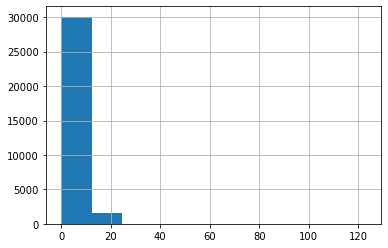

In [279]:
df['person_emp_length'].hist()

In [280]:
df["loan_status"].unique()

array([1, 0], dtype=int64)

In [281]:
# since distribution for "Person_emp_length" column is 'Skewed', we will use "Median" for impute.
#df['person_emp_length']
df['person_emp_length'].median()


4.0

In [282]:
df['person_emp_length'].fillna(df['person_emp_length'].median(),inplace=True)

In [283]:
for c in df.columns:
    string_null = np.array([x in a[2:] for x in df[c]])
    print(c, df[c].isnull().sum(), string_null.sum()) 

person_age 0 0
person_income 0 0
person_home_ownership 0 0
person_emp_length 0 0
loan_intent 0 0
loan_grade 0 0
loan_amnt 0 0
loan_status 0 0
loan_percent_income 0 0
cb_person_default_on_file 0 0
cb_person_cred_hist_length 0 0


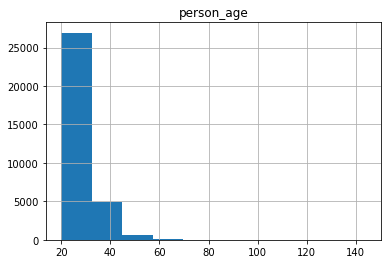

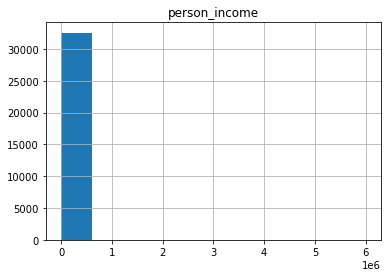

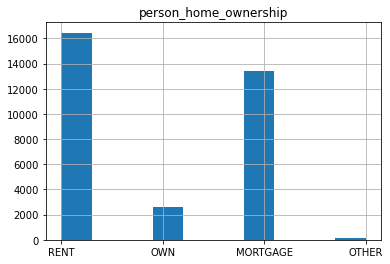

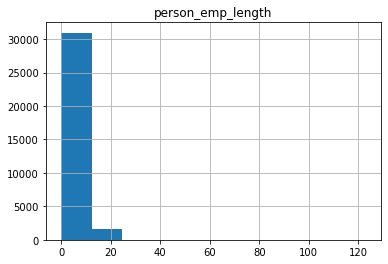

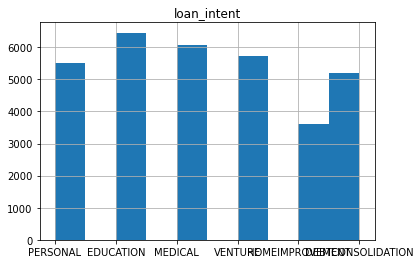

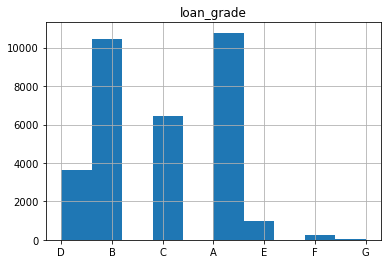

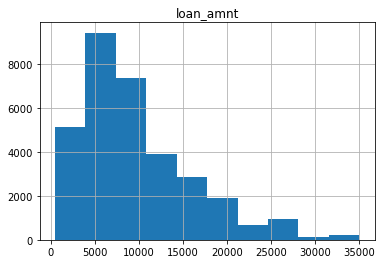

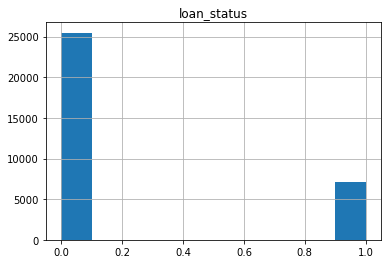

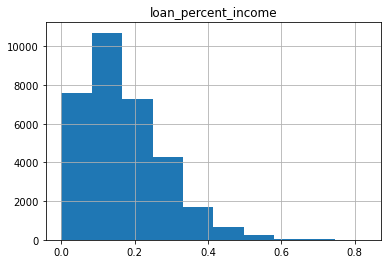

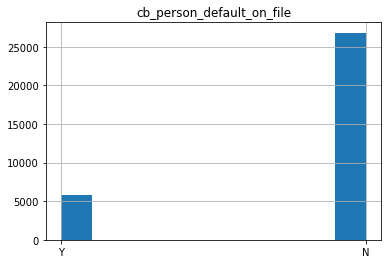

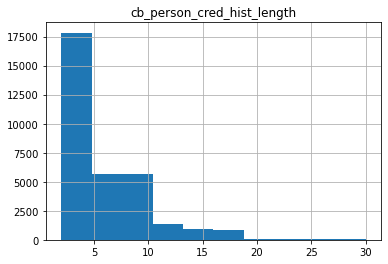

In [284]:
# Histograph to get an idea of data distribution 
# important finding is that data is imbalanced..based on the historgraph for loan status
# why  - lot of alogorithm has parameter based on whether data is balanaced or imbalanced
for c in df.columns:
    df[c].hist()
    plt.title(c)
    plt.show()


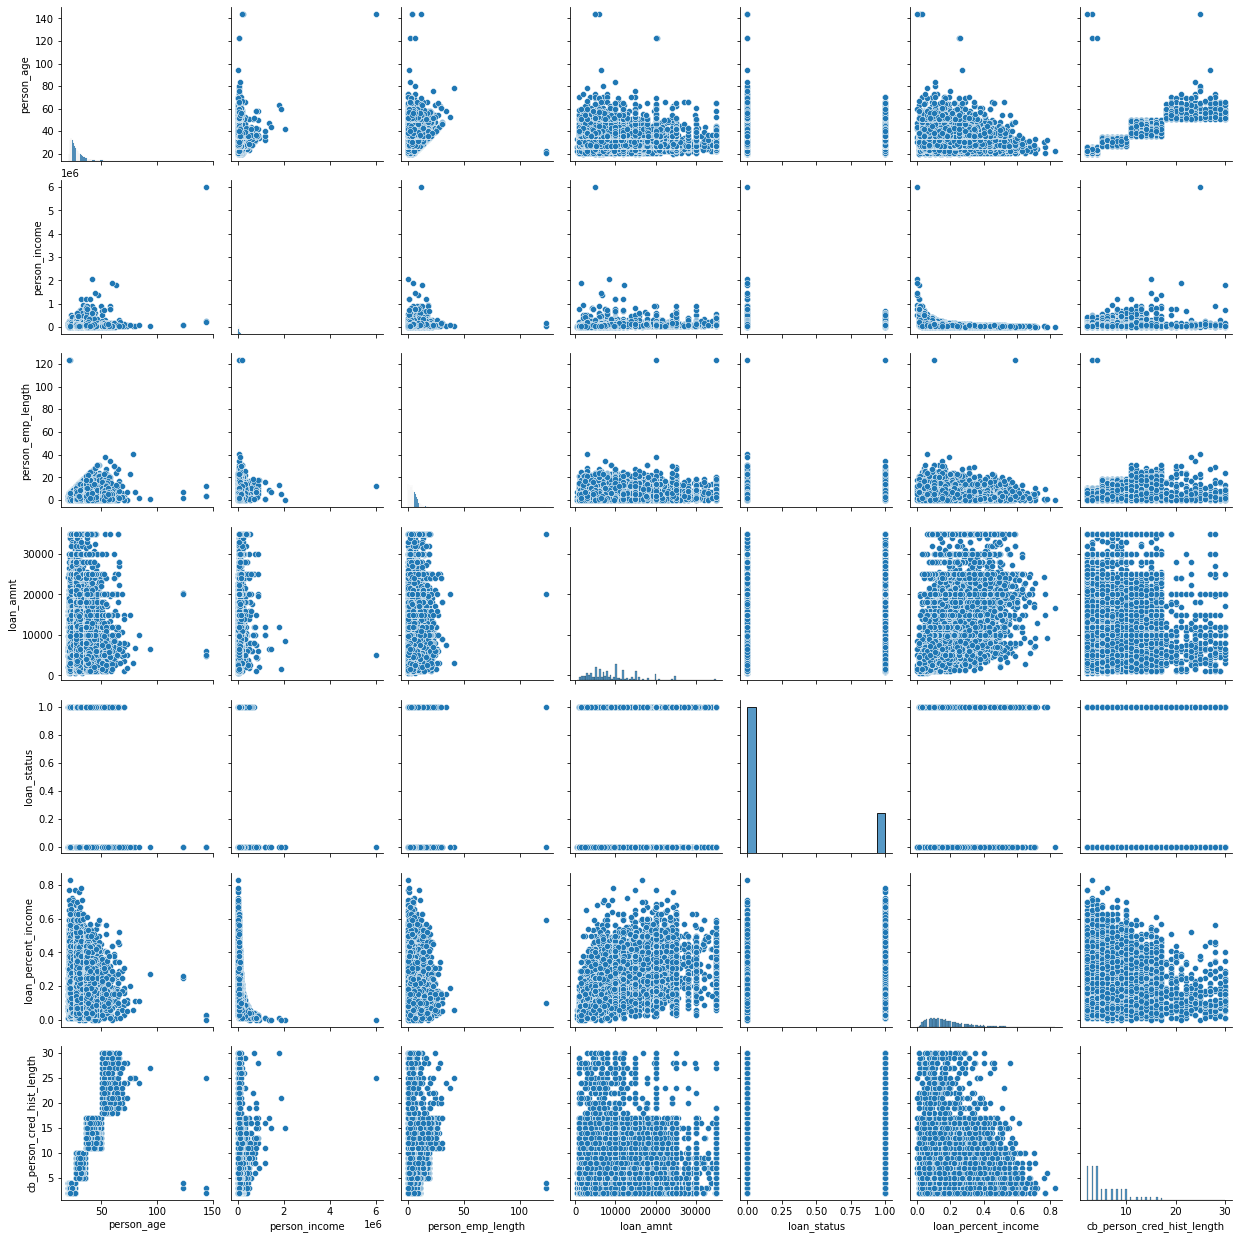

In [285]:
sns.pairplot(df)

Text(0.5, 1.0, 'Correlation Heatmap')

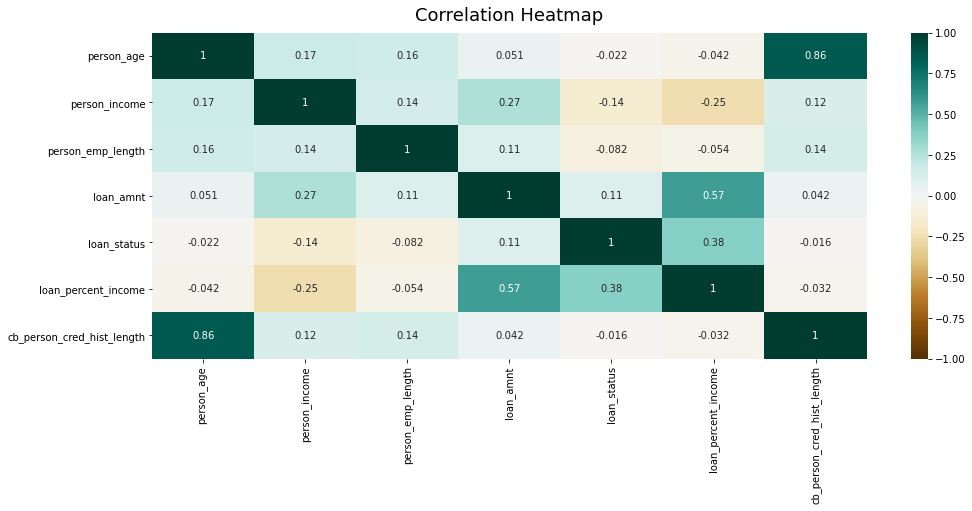

In [286]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
# few things standout is strong correlation between Person_age and cb_person_cred_hist_length
# We can take out one the column as they are correlated.

In [288]:
df.info()
# New Dataset after 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_status                 32581 non-null  int64  
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 2.7+ MB


In [289]:
# Outlier Detection and One Hot Encoding

In [290]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,0,0.10,N,26


<AxesSubplot:xlabel='loan_status', ylabel='person_age'>

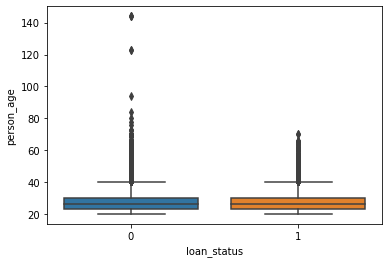

In [291]:
sns.boxplot(y=df['person_age'], x=df['loan_status'], data=df)

In [292]:
# Let's drop few outlier based on what we see person's age >110 and person_emp_length >60
# let's do this based on 

In [293]:
df.shape[0]


32581

<AxesSubplot:xlabel='loan_status', ylabel='person_income'>

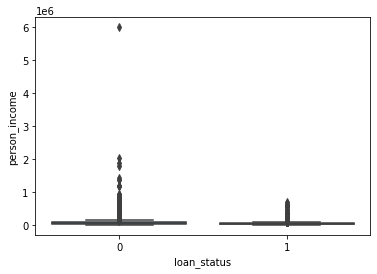

In [294]:
sns.boxplot(y=df['person_income'], x=df['loan_status'], data=df)

<AxesSubplot:xlabel='loan_status', ylabel='person_emp_length'>

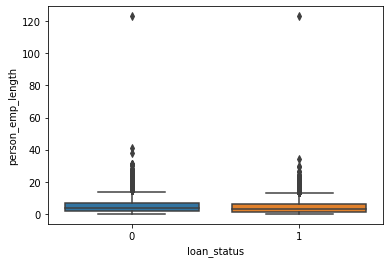

In [295]:
sns.boxplot(y=df['person_emp_length'], x=df['loan_status'], data=df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

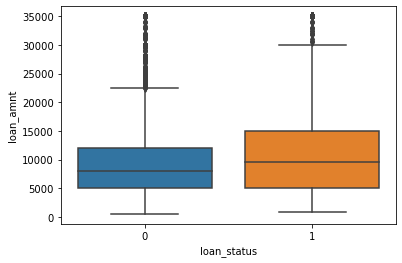

In [296]:
sns.boxplot(y=df['loan_amnt'], x=df['loan_status'], data=df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_percent_income'>

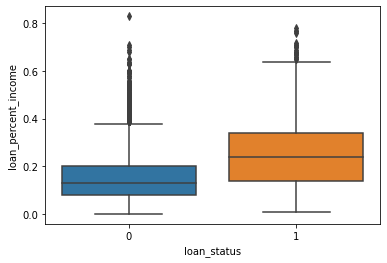

In [297]:
sns.boxplot(y=df['loan_percent_income'], x=df['loan_status'], data=df)

In [298]:
# Let's take out outlier where age is greater than 100...
df=df[df['person_age']<100]

In [299]:
# Let's take out outlier where person_emp_length is greater than 70...
df=df[df['person_emp_length']<70]

In [300]:
df[df['loan_status']==1]


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,1,0.45,N,3
...,...,...,...,...,...,...,...,...,...,...,...
32563,52,71520,RENT,0.0,EDUCATION,E,7000,1,0.10,Y,24
32565,57,40000,RENT,1.0,MEDICAL,A,15000,1,0.38,N,21
32571,60,45600,RENT,1.0,VENTURE,B,20000,1,0.44,N,26
32574,52,65004,RENT,4.0,PERSONAL,D,20000,1,0.31,Y,19


In [301]:
# let's go statistically and figure out a way to take out outlier
# I didn't use this one...and took the outlier based on certain value.
q1=df.quantile(0.25)
q3=df.quantile(0.75)

IQR=q3-q1

#outlier=(df[(df < q1-IQR*1.5 )| (df  > q3+IQR*1.5)])

In [302]:
#Total_Outlier=df[~outlier['person_age'].isnull()|~outlier['person_income'].isnull()|~outlier['person_emp_length'].isnull() |~outlier['loan_amnt'].isnull()|~outlier['loan_percent_income'].isnull()]

In [303]:
#Total_Outlier[Total_Outlier['loan_status']==1]

In [304]:
#Taking out outlier from the dataset...
# we could have used multiple methodsand determine which column value are real outlier and which are not 
# however since we don't have SME, I'll simply drop the rows with outlier
#df=df[ ~((df < q1-IQR*1.5 )| (df  > q3+IQR*1.5))].dropna()

In [305]:
df[df['loan_status']==1]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,1,0.45,N,3
...,...,...,...,...,...,...,...,...,...,...,...
32563,52,71520,RENT,0.0,EDUCATION,E,7000,1,0.10,Y,24
32565,57,40000,RENT,1.0,MEDICAL,A,15000,1,0.38,N,21
32571,60,45600,RENT,1.0,VENTURE,B,20000,1,0.44,N,26
32574,52,65004,RENT,4.0,PERSONAL,D,20000,1,0.31,Y,19


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32574 entries, 1 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32574 non-null  int64  
 1   person_income               32574 non-null  int64  
 2   person_home_ownership       32574 non-null  object 
 3   person_emp_length           32574 non-null  float64
 4   loan_intent                 32574 non-null  object 
 5   loan_grade                  32574 non-null  object 
 6   loan_amnt                   32574 non-null  int64  
 7   loan_status                 32574 non-null  int64  
 8   loan_percent_income         32574 non-null  float64
 9   cb_person_default_on_file   32574 non-null  object 
 10  cb_person_cred_hist_length  32574 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 3.0+ MB


In [307]:
df['person_age'].dtype=='float64'

False

In [313]:
df_numeric=df[['loan_status','person_age','person_income','person_emp_length','loan_amnt','loan_percent_income','cb_person_cred_hist_length']]

In [314]:
df_categorical=df[['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']]

In [323]:
one_hot_encoded= pd.get_dummies(df_categorical)

In [316]:
df_numeric['cb_person_cred_hist_length']

1         2
2         3
3         2
4         4
5         2
         ..
32576    30
32577    19
32578    28
32579    26
32580    30
Name: cb_person_cred_hist_length, Length: 32574, dtype: int64

In [317]:
#df_categorical

In [324]:
df_data=pd.concat([df_numeric,one_hot_encoded],axis=1)

In [326]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32574 entries, 1 to 32580
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_status                     32574 non-null  int64  
 1   person_age                      32574 non-null  int64  
 2   person_income                   32574 non-null  int64  
 3   person_emp_length               32574 non-null  float64
 4   loan_amnt                       32574 non-null  int64  
 5   loan_percent_income             32574 non-null  float64
 6   cb_person_cred_hist_length      32574 non-null  int64  
 7   person_home_ownership_MORTGAGE  32574 non-null  uint8  
 8   person_home_ownership_OTHER     32574 non-null  uint8  
 9   person_home_ownership_OWN       32574 non-null  uint8  
 10  person_home_ownership_RENT      32574 non-null  uint8  
 11  loan_intent_DEBTCONSOLIDATION   32574 non-null  uint8  
 12  loan_intent_EDUCATION           

Text(0.5, 1.0, 'Correlation Heatmap')

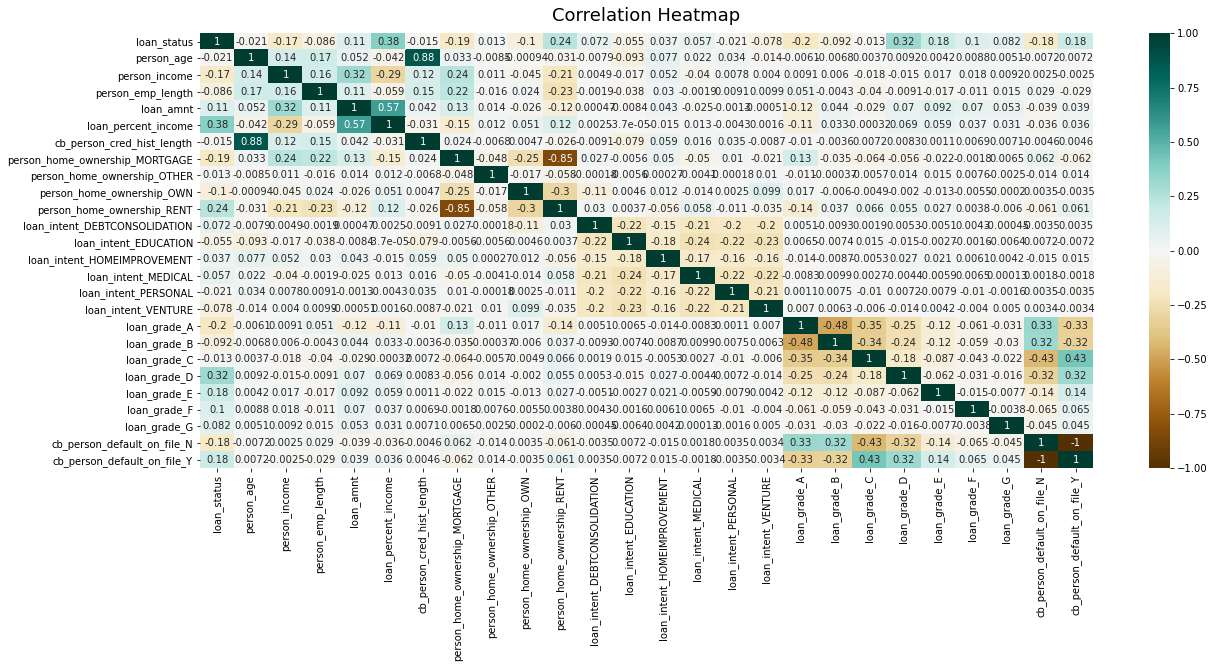

In [325]:
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(df_data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

In [54]:
# features strongly correlated to each other 
# Person's age and db_person_cred_hist_length are strongly correlated. Correlation value is =0.88
#Lets drop a column - db_person_cred_hist_length
# similarly person_home_ownership_MORTGAGE and person_home_ownership_rent has strong -ve correlation between them
#Let’s drop a feature - person_home_ownership_MORTGAGE


In [55]:
# features strongly correlated to each other and hence we take either of features which are storngly correlation betweeen them.
df_data=df_data.drop(['cb_person_cred_hist_length','person_home_ownership_MORTGAGE'], axis=1)
#df_data.columns

In [56]:
df_data

,loan_status,person_age,person_income,person_emp_length,loan_amnt,loan_percent_income,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,0,21,9600,5.0,1000,0.10,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,25,9600,1.0,5500,0.57,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,23,65500,4.0,35000,0.53,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,1,24,54400,8.0,35000,0.55,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
5,1,21,9900,2.0,2500,0.25,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,0,57,53000,1.0,5800,0.11,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
32577,0,54,120000,4.0,17625,0.15,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
32578,1,65,76000,3.0,35000,0.46,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
32579,0,56,150000,5.0,15000,0.10,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [327]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [328]:
y=df_data['loan_status']

In [329]:
X=df_data.loc[:,df_data.columns!="loan_status"]

In [330]:
# Let's use SKlearn module test and train split so that we can use "training dataset for train the model "
#  We can use "testdataset for testing the model "
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.8)

In [331]:
X_train.shape

(26059, 25)

In [332]:
X_test.shape

(6515, 25)

In [333]:
Logistic_Model=LogisticRegression(penalty='l2', class_weight=None, solver='lbfgs', max_iter=100).fit(X_train,y_train)

In [64]:
Logistic_Model.score(X_train,y_train)

0.8033227180293904

In [334]:
# Let's try with both generalization option - lasso and ridge...I kept Lasso= L1 as I'm getting better performance with it.
# same with solver too. I tried 'lbfgs' and libilinear provides better accuracy.
Logistic_Model=LogisticRegression(penalty='l1', tol=0.000001, C=1000,class_weight=None, solver='liblinear', max_iter=1000).fit(X_train,y_train)


In [66]:
Logistic_Model.score(X_train,y_train)

0.8663239074550129

In [335]:
Logistic_Model.score(X_test,y_test)

0.8718342287029931

In [336]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score, recall_score

In [337]:
yp=Logistic_Model.predict(X_test)

In [338]:
print('acc',accuracy_score(y_test,yp))
print('recall',recall_score(y_test,yp))
print('precision',precision_score(y_test,yp))
print('F1',f1_score(y_test,yp))

acc 0.8718342287029931
recall 0.5743626062322946
precision 0.7760765550239235
F1 0.6601546601546602


In [339]:
pd.DataFrame(confusion_matrix(y_test,yp,labels=[0,1]))

,0,1
0,4869,234
1,601,811


In [340]:
# let's try cross validation method ...for the next model..try the Grid Search
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [342]:
Logistic_Model_C_1=LogisticRegression(penalty='l1', tol=0.000001, C=1, solver='liblinear', max_iter=1000)
Logistic_Model_C_10=LogisticRegression(penalty='l1', tol=0.000001, C=10, solver='liblinear', max_iter=1000)
Logistic_Model_C_100=LogisticRegression(penalty='l1', tol=0.000001, C=100, solver='liblinear', max_iter=1000)

In [343]:
# Let cross validate for L1 model  where C=1 and get all important evaluation matrics
score_C_1=cross_validate(Logistic_Model_C_1,X,y,cv=5,scoring=('accuracy','f1','precision','recall','roc_auc'))

In [344]:
score_C_1

{'fit_time': array([2.15526032, 1.88501811, 1.71584487, 1.35544705, 2.1185236 ]),
 'score_time': array([0.02593112, 0.02293706, 0.01595426, 0.01695776, 0.01691055]),
 'test_accuracy': array([0.85817345, 0.87183423, 0.85970837, 0.86584804, 0.85124348]),
 'test_f1': array([0.63679245, 0.66904479, 0.60603448, 0.65095847, 0.54783014]),
 'test_precision': array([0.72128228, 0.76588022, 0.78285078, 0.75323475, 0.81301939]),
 'test_recall': array([0.57002111, 0.59394792, 0.49437412, 0.57313643, 0.41308937]),
 'test_roc_auc': array([0.86139079, 0.87618197, 0.86369933, 0.85927473, 0.87092493])}

In [345]:
print('acc',score_C_1['test_accuracy'].mean())
print('f1',score_C_1['test_f1'].mean())
print('precision',score_C_1['test_precision'].mean())
print('recall',score_C_1['test_recall'].mean())
print('roc_auc',score_C_1['test_roc_auc'].mean())

acc 0.8613615116953366
f1 0.6221320669300717
precision 0.7672534835895766
recall 0.5289137916187864
roc_auc 0.8662943508923207


In [77]:
score_C_10=cross_validate(Logistic_Model_C_10,X,y,cv=5,scoring=('accuracy','f1','precision','recall','roc_auc'))

In [346]:
print('acc',score_C_10['test_accuracy'].mean())
print('f1',score_C_10['test_f1'].mean())
print('precision',score_C_10['test_precision'].mean())
print('recall',score_C_10['test_recall'].mean())
print('roc_auc',score_C_10['test_roc_auc'].mean())

acc 0.8615056108418642
f1 0.6230629890991854
precision 0.7670035301358562
recall 0.5298990132936632
roc_auc 0.8665742350662928


In [79]:
# conclusion Logarithmic model
# 1) we do have better accuracy and roc_auc value, however, we don;t seee good "F1" and "Recall" value.

In [347]:
# Let's start with KNN Model

from sklearn.neighbors import KNeighborsClassifier

In [348]:
KNN_Model_Manhattan=KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='auto', p=1, 
                     metric='minkowski', metric_params=None, n_jobs=None).fit(X_train,y_train)

In [349]:
KNN_Model_Manhattan.score(X_train,y_train)

0.8585133734985994

In [350]:
KNN_Model_Manhattan.score(X_test,y_test)

0.8408288564850346

In [351]:
KNN_Model_Euclidean=KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='auto', p=2, 
                     metric='minkowski', metric_params=None, n_jobs=None).fit(X_train,y_train)

In [352]:
KNN_Model_Euclidean.score(X_train,y_train)

0.8547526766184428

In [353]:
KNN_Model_Euclidean.score(X_test,y_test)

0.8379125095932464

In [356]:
KNN_Model_Euclidean=KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='auto', 
                     metric='chebyshev', metric_params=None, n_jobs=None).fit(X_train,y_train)

In [357]:
KNN_Model_Euclidean.score(X_train,y_train)

0.8540235619171879

In [89]:
#KNN Model for cross validatin 
KNN_For_Cross_Validation_10=KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='auto', p=1, 
                     metric='minkowski', metric_params=None, n_jobs=None)

KNN_For_Cross_Validation_20=KNeighborsClassifier(n_neighbors=20, weights='uniform', algorithm='auto', p=1, 
                     metric='minkowski', metric_params=None, n_jobs=None)

In [358]:
# Since we are getting better accuracy with Manhattan distance , which is P=1 ,let's get performance matrices
score_knn_10=cross_validate(KNN_For_Cross_Validation_10,X,y,cv=5,scoring=('accuracy','f1','precision','recall','roc_auc'))
score_knn_20=cross_validate(KNN_For_Cross_Validation_20,X,y,cv=5,scoring=('accuracy','f1','precision','recall','roc_auc'))

In [359]:
print('acc',score_knn_10['test_accuracy'].mean())
print('f1',score_knn_10['test_f1'].mean())
print('precision',score_knn_10['test_precision'].mean())
print('recall',score_knn_10['test_recall'].mean())
print('roc_auc',score_knn_10['test_roc_auc'].mean())

acc 0.818567543641171
f1 0.47913599948504154
precision 0.649916015291925
recall 0.3870804716474106
roc_auc 0.7928124126031234


In [92]:
print('acc',score_knn_20['test_accuracy'].mean())
print('f1',score_knn_20['test_f1'].mean())
print('precision',score_knn_20['test_precision'].mean())
print('recall',score_knn_20['test_recall'].mean())
print('roc_auc',score_knn_20['test_roc_auc'].mean())

acc 0.8227083459947696
f1 0.48541476343947443
precision 0.6671746427869631
recall 0.3901777734227694
roc_auc 0.8016956380915463


In [93]:
# Now Let's use Decision Tree 

In [360]:
from sklearn.tree import DecisionTreeClassifier

In [361]:
DT_Model=DecisionTreeClassifier(splitter='best', random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

In [362]:
from sklearn.model_selection import GridSearchCV

In [363]:
#parameters = {'max_depth':[3,5,7,10],'min_samples_leaf':[1,2,5,10,14,20],'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2'],'min_samples_split':[2,3,4,5,6,8],'min_weight_fraction_leaf':[0.0,0.1,0.5,1]}
parameters = {'max_depth':[3,5,7,10,14],'min_samples_leaf':[1,2,5,10,14,20],'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2'],'min_samples_split':[2,5,8]}

In [364]:
DT_Grid=GridSearchCV(DT_Model,parameters)

In [365]:
DT_Grid.fit(X,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 14],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10, 14, 20],
                         'min_samples_split': [2, 5, 8]})

In [106]:
DT_Grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=14, max_features='sqrt',
                       min_samples_split=8)

In [110]:
DT_Grid.best_score_

0.9072101873798342

In [107]:
# So best estimator for decision tree based on Grid Search is as follow 

DT_Model_Best=DecisionTreeClassifier(criterion='entropy', splitter='best',max_depth=14, min_weight_fraction_leaf=0.0, min_samples_split=8,max_features='sqrt', random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

In [111]:
Score_Decision_Tree=cross_validate(DT_Model_Best,X,y,cv=5,scoring=('accuracy','f1','precision','recall','roc_auc'))

In [112]:
print('acc',Score_Decision_Tree['test_accuracy'].mean())
print('f1',Score_Decision_Tree['test_f1'].mean())
print('precision',Score_Decision_Tree['test_precision'].mean())
print('recall',Score_Decision_Tree['test_recall'].mean())
print('roc_auc',Score_Decision_Tree['test_roc_auc'].mean())

acc 0.8947794318913666
f1 0.7296904637865009
precision 0.8359837077221309
recall 0.6548604368271388
roc_auc 0.8647637072489255


In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [115]:
RF_Model= RandomForestClassifier(max_depth=None,bootstrap=True,min_samples_split=2, min_samples_leaf=1)

In [118]:
parameters_RF = {'n_estimators':[40,60,100],'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}

In [119]:
DT_Grid_RF=GridSearchCV(RF_Model,parameters_RF)

In [121]:
Fitted_Grid=DT_Grid_RF.fit(X,y)

In [122]:
Fitted_Grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_features='sqrt')

In [127]:
Fitted_Grid.best_index_


14

In [134]:
Fitted_Grid.best_score_

0.9269776974983829

In [136]:
# Let's fit a model based on best parameter provided by GridSearchCV, with tree=50
RF_Model_50=RandomForestClassifier(n_estimators=50,criterion='entropy',max_features='sqrt',max_depth=None,
                                   bootstrap=True,min_samples_split=2, min_samples_leaf=1).fit(X_train,y_train)




In [138]:
# Random Forest Score on a Training data
RF_Model_50.score(X_train,y_train)

0.9993093657675632

In [140]:
# Random Forest Score on a Test data
RF_Model_50.score(X_test,y_test)

0.9344689993861265

In [137]:
# Let's fit a model based on best parameter provided by GridSearchCV, with tree=50
RF_Model_100=RandomForestClassifier(n_estimators=100,criterion='entropy',max_features='sqrt',
                                    max_depth=None,bootstrap=True,min_samples_split=2, min_samples_leaf=1).fit(X_train,y_train)

In [139]:
# Random Forest Score on a Training data
RF_Model_100.score(X_train,y_train)

0.9999616314315313

In [141]:
## Random Forest Score on a Test data
RF_Model_100.score(X_test,y_test)

0.9350828729281768

In [142]:
# Let's test other performance matrices for Random Forest

score_RF_Model_100=cross_validate(RF_Model_100,X,y,cv=5,scoring=('accuracy','f1','precision','recall','roc_auc'))



In [143]:
print('acc',score_RF_Model_100['test_accuracy'].mean())
print('f1',score_RF_Model_100['test_f1'].mean())
print('precision',score_RF_Model_100['test_precision'].mean())
print('recall',score_RF_Model_100['test_recall'].mean())
print('roc_auc',score_RF_Model_100['test_roc_auc'].mean())

acc 0.9253816404227482
f1 0.8065715788978916
precision 0.9296445158553327
recall 0.7180268644632304
roc_auc 0.9070936713895715


In [158]:
# Random Forest provides which are important features - statistically significant features
# 1. get fitted model and get's importance value of each feature
importances = RF_Model_100.feature_importances_
#2. get features name 
feature_names = [f"{i}" for i in X.columns]

#3. associate them together
forest_importances = pd.Series(importances, index=feature_names)

# 4. get Standard deviation too
std = np.std([tree.feature_importances_ for tree in RF_Model_100.estimators_], axis=0)

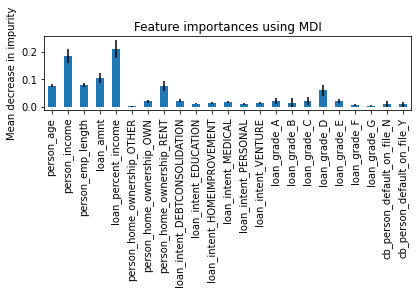

In [159]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [161]:
from sklearn.ensemble import AdaBoostClassifier

In [187]:
Adaboost_Model_50=AdaBoostClassifier(base_estimator=None, n_estimators=50,learning_rate=1, 
                                  algorithm='SAMME.R', random_state=None).fit(X_train,y_train)

In [188]:
Adaboost_Model_50.score(X_train,y_train)

0.8868510915857729

In [189]:
Adaboost_Model_50.score(X_test,y_test)

0.8910374462860651

In [190]:
# Let's fit best model to get other performance matrics 
Adaboost_Best_Model= AdaBoostClassifier(base_estimator=None, n_estimators=50,learning_rate=1, 
                                  algorithm='SAMME.R', random_state=None)

In [192]:
# Since we don't want the model to train with data with replacement and want to train on the same dataset, we took cv=2
# one for traiinng and other for test
Scoring_Adaboost_Model=cross_validate(Adaboost_Best_Model,X,y,cv=2,scoring=('accuracy','f1','precision','recall','roc_auc'))

In [193]:
print('acc',Scoring_Adaboost_Model['test_accuracy'].mean())
print('f1',Scoring_Adaboost_Model['test_f1'].mean())
print('precision',Scoring_Adaboost_Model['test_precision'].mean())
print('recall',Scoring_Adaboost_Model['test_recall'].mean())
print('roc_auc',Scoring_Adaboost_Model['test_roc_auc'].mean())

acc 0.8834217606695152
f1 0.7156081875756026
precision 0.7648526152135932
recall 0.67482131263838
roc_auc 0.8926353491797323


In [194]:
from sklearn.ensemble import GradientBoostingClassifier

In [198]:
Gradient_Boost_Model=GradientBoostingClassifier(loss='exponential', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, 
                                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, 
                                                 random_state=None,
                                                 max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, 
                                                 n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0).fit(X_train,y_train)

In [199]:
Gradient_Boost_Model.score(X_train,y_train)

0.9274834055941373

In [206]:
Gradient_Boost_Model.score(X_test,y_test)

0.9280233271945979

In [207]:
Gradient_Boost_Best_Model=GradientBoostingClassifier(loss='exponential', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, 
                                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, 
                                                 random_state=None,
                                                 max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, 
                                                 n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [208]:
Scoring_Gradient_Boost_Model=cross_validate(Gradient_Boost_Best_Model,X,y,cv=2,scoring=('accuracy','f1','precision','recall','roc_auc'))

In [210]:
print('acc',Scoring_Gradient_Boost_Model['test_accuracy'].mean())
print('f1',Scoring_Gradient_Boost_Model['test_f1'].mean())
print('precision',Scoring_Gradient_Boost_Model['test_precision'].mean())
print('recall',Scoring_Gradient_Boost_Model['test_recall'].mean())
print('roc_auc',Scoring_Gradient_Boost_Model['test_roc_auc'].mean())

acc 0.9150066303543263
f1 0.7814507656739087
precision 0.8905157493942542
recall 0.6966353304831208
roc_auc 0.9255681287561279
